# Customer Analytics¶
## What is A/B test
- test two or more variants agianst each other
- to evaluate which one performs best
- in the context of randomized experiment

##  A/B testing Process

1. develop a hypothesis about your product or business 

2. randomly assign users to two different groups

 - group 1 to current product rules

 - group 2 to a product that test hypothesis

3. pick according to KPI

## Key performance indicators (KPIs)
**How to identity KPIs: 
- experience+Domain knowledge + exploratory data analysis
- stability over time
- the importance with other factors

## Question: which paywall has a higher conversion rate
- Current paywall:" I hoped that you enjoyed your free-trail, please consider subscribing"(control)
- Proposed paywall:" Your free-trail has ended, do not miss out, subscribe today"(experiment)

### Process
- Randomly subset the users and show one set the contrl and one the treatment
- Monitor the conversion rates of each group to see which is better
 
### The importance of randomness
- isolate the impact of the change made
- reduce the potential impact of confounding variabels
- use a assigment criteria may introduce confounders

### Pros and Cons
- Pros: users are impacted individually; testing changes that directly impact hteir behavior
- Cons: challenging to segment the users inot groups; difficult to untangle the impact of the test

##  Initial A/B test design
### Responsabe variable

- The quantity used to measure the impact of your change
- Should either be a KPI or directly related to a KPI
- The easier to measure, the better

### Factors & variants

- Factors: the type of variable you are changing

 - The paywall color
 
- Variants: Particular changes you are testing

 - A red vs a blue paywall

### Experimental unit of our test
- The smallest unit you are measuring the change over
- Individual users make a convenient experimental unit

## Preparing to run an A/B test
### test sensitivity 
- First question: what size of impact is meaningful to test

- Smaller changes=more difficult to dect

- Sensitivity: the minimum level of change we want to be able to detect in our test
 - Evaluate different sensitivity values

### Data variability
- Standard Error
    - the variance and standard deviation of the estimate
- Hypothesis
    - Null Hypothesise: The launch of feature does not statistical significant change the KPI
    - Reject Null Hypothesise: The launch of feature does statistical significant change the KPI
### Parameters
- Statistical Power
    - Probability of finding a statistically significant result when the Null Hypothesis is false
- Estimate sample size
    - needed level of sensitivity
    - our desired test power & confidence level
- Effect size

### Significance or Not?
- P-value
 - probability if the Null Hypothesis is true...
 - Low p-values: the observation is unlikely to have happened due to randomness
- Test
 - how significant the differences between groups are
  - One-sample:same population
  - Two-sample: different population

## Our data set
We are looking at data from an app. The app is very simple and has just  4  pages:

* The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.
* From the home page, the user can perform a search and land on the search page.
* From the search page, if the user clicks on a product, she will get to the payment page (paywall), where she is asked to provide payment information in order to subscribe.
* If she does decide to buy, she ends up on the confirmation page

**Data set overview** We have  5  files,  4  of them contains page_visit information and  1  of them contains user information.

- page_visit_information
 - home_page_table.csv
 - search_page_table.csv
 - payment_page_table.csv
 - payment_confirmation_table.csv
- user_information page
 - user_table.csv

### Import

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from functools import reduce
from sklearn import preprocessing
from scipy import stats

In [2]:
user_table = pd.read_csv('user_table.csv')

In [3]:
user_table

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male
...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female
90396,642989,2015-02-08,Desktop,Female
90397,659645,2015-04-13,Desktop,Male
90398,359779,2015-03-23,Desktop,Male


### Create control and test groups
randomized two groups

In [4]:
length=len(user_table['user_id'])

In [5]:
k=np.random.binomial(1,0.495,length)

In [6]:
user_table['group']=k
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
 4   group    90400 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


In [7]:
user_table['group']=user_table['group'].replace(1,'test')
user_table['group']=user_table['group'].replace(0,'control')

### import datasets

In [8]:
home_page = pd.read_csv('home_page_table.csv')
payment_confirmation= pd.read_csv('payment_confirmation_table.csv')
payment_page= pd.read_csv('payment_page_table.csv')
search_page= pd.read_csv('search_page_table.csv')

In [9]:
home_page.columns
payment_confirmation.columns

Index(['user_id', 'page'], dtype='object')

In [171]:
# Compile the list of dataframes you want to merge
data_frames = [user_table, home_page, search_page, payment_page, payment_confirmation]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'], how='outer'), data_frames)
df_merged.columns = ['user_id', 'date', 'device', 'sex', 'group', 'home_page', 'search_page', 
                     'payment_page', 'payment_confirm']
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          90400 non-null  int64 
 1   date             90400 non-null  object
 2   device           90400 non-null  object
 3   sex              90400 non-null  object
 4   group            90400 non-null  object
 5   home_page        90400 non-null  object
 6   search_page      45200 non-null  object
 7   payment_page     6030 non-null   object
 8   payment_confirm  452 non-null    object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [10]:
df=user_table.merge(home_page,on=['user_id'],how='left')

In [11]:
df=df.merge(search_page,on=['user_id'],how='left')

In [12]:
df=df.merge(payment_page,on=['user_id'],how='left')

In [13]:
df=df.merge(payment_confirmation,on=['user_id'],how='left')

In [14]:
df

,user_id,date,device,sex,group,page_x,page_y,page_x,page_y
0,450007,2015-02-28,Desktop,Female,control,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,control,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,test,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,test,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,control,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,test,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,test,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,test,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,test,home_page,NaN,NaN,NaN


In [15]:
df.columns=['user_id','date','device','sex','group','home_page','search_page',
           'payment_page','payment_confirmation']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               90400 non-null  int64 
 1   date                  90400 non-null  object
 2   device                90400 non-null  object
 3   sex                   90400 non-null  object
 4   group                 90400 non-null  object
 5   home_page             90400 non-null  object
 6   search_page           45200 non-null  object
 7   payment_page          6030 non-null   object
 8   payment_confirmation  452 non-null    object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [17]:
df['date']=pd.to_datetime(df['date'],utc=True)

In [18]:
df['home_page']=df['home_page'].fillna(0)
df['search_page']=df['search_page'].fillna(0)
df['payment_page']=df['payment_page'].fillna(0)
df['payment_confirmation']=df['payment_confirmation'].fillna(0)

In [19]:
df['home_page']=df['home_page'].replace('home_page',1)
df['search_page']=df['search_page'].replace('search_page',1)
df['payment_page']=df['payment_page'].replace('payment_page',1)
df['payment_confirmation']=df['payment_confirmation'].replace('payment_confirmation_page',1)

In [20]:
df['search_page'].value_counts()

0    45200
1    45200
Name: search_page, dtype: int64

In [21]:
df['payment_page'].value_counts()

0    84370
1     6030
Name: payment_page, dtype: int64

In [23]:
df['payment_confirmation'].value_counts()

0    89948
1      452
Name: payment_confirmation, dtype: int64

## EAD

- overall Conversion rate
- group by gender
- group by device

In [24]:
df_purchase=df.groupby(by=['date'],as_index=False)

In [25]:
df_purchase=df_purchase.agg({'payment_confirmation':['sum','count']})

In [26]:
df_purchase.columns=df_purchase.columns.droplevel(level=0)

In [27]:
df_purchase.columns=['date','sum','count']

In [28]:
df_purchase

,date,sum,count
0,2015-01-01 00:00:00+00:00,6,712
1,2015-01-02 00:00:00+00:00,5,721
2,2015-01-03 00:00:00+00:00,7,760
3,2015-01-04 00:00:00+00:00,7,713
4,2015-01-05 00:00:00+00:00,11,754
...,...,...,...
115,2015-04-26 00:00:00+00:00,1,792
116,2015-04-27 00:00:00+00:00,1,779
117,2015-04-28 00:00:00+00:00,1,736
118,2015-04-29 00:00:00+00:00,0,713


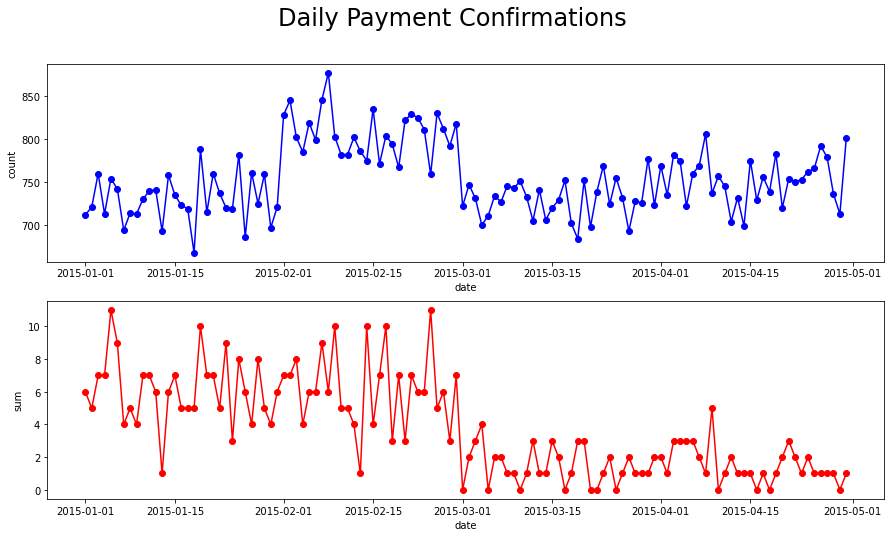

In [29]:
fig,ax=plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_purchase['date'],df_purchase['count'],color='b',linestyle='-',marker='o')
ax[0].set_ylabel('count')
ax[0].set_xlabel('date')
ax[1].plot(df_purchase['date'],df_purchase['sum'],color='r',linestyle='-',marker='o')
ax[1].set_ylabel('sum')
ax[1].set_xlabel('date')
fig.suptitle(f'Daily Payment Confirmations', fontsize=24)
plt.show()

### Sex

In [56]:
### group by sex
sex_purchases = df.groupby(by=['date','sex']).agg({'payment_confirmation':['sum','count']})
sex_purchases.columns = sex_purchases.columns.droplevel(level=1)
sex_purchases.reset_index(inplace=True)
sex_purchases.columns=['date','sex','sum','count']

In [57]:
sex_pivot = pd.pivot_table(sex_purchases, values=['sum'], columns=['sex'], index=['date'])

In [58]:
sex_pivot.columns=sex_pivot.columns.droplevel(level=0)

In [59]:
sex_pivot=sex_pivot.reset_index()

In [60]:
sex_pivot

sex,date,Female,Male
0,2015-01-01 00:00:00+00:00,3,3
1,2015-01-02 00:00:00+00:00,2,3
2,2015-01-03 00:00:00+00:00,3,4
3,2015-01-04 00:00:00+00:00,2,5
4,2015-01-05 00:00:00+00:00,6,5
...,...,...,...
115,2015-04-26 00:00:00+00:00,1,0
116,2015-04-27 00:00:00+00:00,1,0
117,2015-04-28 00:00:00+00:00,1,0
118,2015-04-29 00:00:00+00:00,0,0


### Devices

In [35]:
### group by sex
device_purchases = df.groupby(by=['date','device']).agg({'payment_confirmation':['sum','count']})
device_purchases

payment_confirmation      
                                                   sum count
date                      device                            
2015-01-01 00:00:00+00:00 Desktop                    1   493
                          Mobile                     5   219
2015-01-02 00:00:00+00:00 Desktop                    1   484
                          Mobile                     4   237
2015-01-03 00:00:00+00:00 Desktop                    3   507
...                                                ...   ...
2015-04-28 00:00:00+00:00 Mobile                     1   260
2015-04-29 00:00:00+00:00 Desktop                    0   453
                          Mobile                     0   260
2015-04-30 00:00:00+00:00 Desktop                    0   538
                          Mobile                     1   263

[240 rows x 2 columns]

In [36]:
device_purchases.reset_index(inplace=True)

In [37]:
device_purchases.columns=device_purchases.columns.droplevel(level=0)

In [38]:
device_purchases.columns=['date','device','sum','count']

In [39]:
device_pivot = pd.pivot_table(device_purchases, values=['count'], columns=['device'], index=['date'])

In [40]:
device_pivot.reset_index()

date   count       
device                           Desktop Mobile
0      2015-01-01 00:00:00+00:00     493    219
1      2015-01-02 00:00:00+00:00     484    237
2      2015-01-03 00:00:00+00:00     507    253
3      2015-01-04 00:00:00+00:00     474    239
4      2015-01-05 00:00:00+00:00     483    271
..                           ...     ...    ...
115    2015-04-26 00:00:00+00:00     529    263
116    2015-04-27 00:00:00+00:00     509    270
117    2015-04-28 00:00:00+00:00     476    260
118    2015-04-29 00:00:00+00:00     453    260
119    2015-04-30 00:00:00+00:00     538    263

[120 rows x 3 columns]

In [41]:
device_pivot.columns=device_pivot.columns.droplevel(level=0)

In [42]:
device_pivot=device_pivot.reset_index()

In [69]:
sex_pivot

sex,date,Female,Male
0,2015-01-01 00:00:00+00:00,3,3
1,2015-01-02 00:00:00+00:00,2,3
2,2015-01-03 00:00:00+00:00,3,4
3,2015-01-04 00:00:00+00:00,2,5
4,2015-01-05 00:00:00+00:00,6,5
...,...,...,...
115,2015-04-26 00:00:00+00:00,1,0
116,2015-04-27 00:00:00+00:00,1,0
117,2015-04-28 00:00:00+00:00,1,0
118,2015-04-29 00:00:00+00:00,0,0


<Figure size 432x288 with 0 Axes>

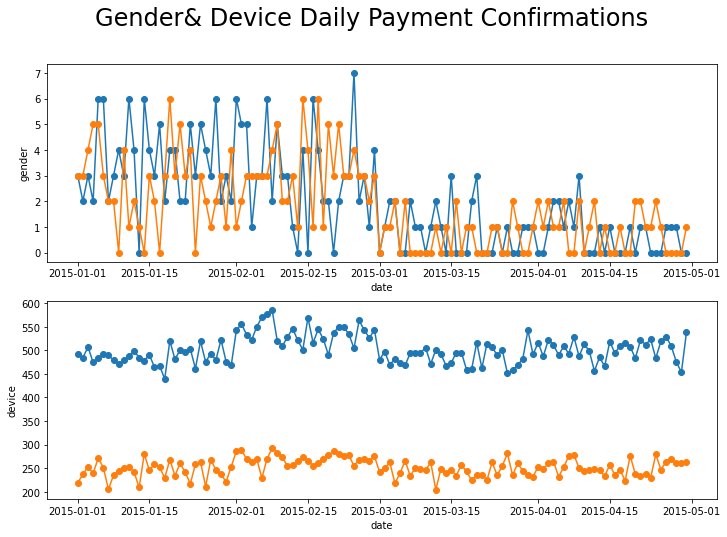

In [72]:
plt.set_cmap('jet')
fig,ax=plt.subplots(2,1,figsize=(12,8))
ax[0].plot(sex_pivot['date'],sex_pivot[['Female','Male']],marker='o')
ax[0].set_ylabel('gender')
ax[0].set_xlabel('date')
ax[1].plot(device_pivot['date'],device_pivot[['Desktop','Mobile']],linestyle='-',marker='o')
ax[1].set_ylabel('device')
ax[1].set_xlabel('date')
fig.suptitle(f'Gender& Device Daily Payment Confirmations', fontsize=24)
plt.show()

## Initial A/B testing
### Resonse variable
- Conversion rate
 - time frame: one day
 - Definition: #of payment confirmation/ # of home page
 - importance: strong measure of growth

In [73]:
df_purchases=round(df_purchase['sum'].mean()*1000,2)
df_views=round(df_purchase['count'].mean()*1000,2)
print('daily purchases=', df_purchases)
print('daily views=', df_views)

daily purchases= 3766.67
daily views= 753333.33


In [74]:
df_purchase

,date,sum,count
0,2015-01-01 00:00:00+00:00,6,712
1,2015-01-02 00:00:00+00:00,5,721
2,2015-01-03 00:00:00+00:00,7,760
3,2015-01-04 00:00:00+00:00,7,713
4,2015-01-05 00:00:00+00:00,11,754
...,...,...,...
115,2015-04-26 00:00:00+00:00,1,792
116,2015-04-27 00:00:00+00:00,1,779
117,2015-04-28 00:00:00+00:00,1,736
118,2015-04-29 00:00:00+00:00,0,713


### Test sensitivity

In [206]:
df

,user_id,date,device,sex,group,home_page,search_page,payment_page,payment_confirmation
0,450007,2015-02-28 00:00:00+00:00,Desktop,Female,test,1,0,0,0
1,756838,2015-01-13 00:00:00+00:00,Desktop,Male,control,1,0,0,0
2,568983,2015-04-09 00:00:00+00:00,Desktop,Male,test,1,1,0,0
3,190794,2015-02-18 00:00:00+00:00,Desktop,Female,test,1,1,0,0
4,537909,2015-01-15 00:00:00+00:00,Desktop,Male,test,1,0,0,0
...,...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30 00:00:00+00:00,Desktop,Female,test,1,0,0,0
90396,642989,2015-02-08 00:00:00+00:00,Desktop,Female,test,1,1,0,0
90397,659645,2015-04-13 00:00:00+00:00,Desktop,Male,control,1,1,0,0
90398,359779,2015-03-23 00:00:00+00:00,Desktop,Male,test,1,0,0,0


In [76]:
df['payment_confirmation'].value_counts()

0    89948
1      452
Name: payment_confirmation, dtype: int64

In [77]:
total_subs_count=np.sum(df['payment_confirmation'])
total_subs_count

452

In [78]:
users_count=len(df['user_id'].unique())
users_count

90400

In [89]:
conversion_rate=round(total_subs_count/users_count*100,2)
std=round(df['payment_confirmation'].std(),2)
print('conversion_rate:%s%%'%(conversion_rate))
print('std:',std)

conversion_rate:0.5%
std: 0.07


In [100]:
##small_sensitivity
small_sensitivity=0.1
small_conversion_rate=(conversion_rate/100)*(1+small_sensitivity)
small_purchases=df_views*small_conversion_rate
purchase_lift=small_purchases-df_purchases

print('small_conversion_rate: %s%%' %(small_conversion_rate*100))
print('small_purchases: %s' %(round(small_purchases,2)))
print('purchase_lift: %s' %(round(purchase_lift,2)))

small_conversion_rate: 0.55%
small_purchases: 4143.33
purchase_lift: 376.66


In [99]:
##medium_sensitivity
medium_sensitivity=0.2
medium_conversion_rate=(conversion_rate/100)*(1+medium_sensitivity)
medium_purchases=df_views*medium_conversion_rate
purchase_lift=medium_purchases-df_purchases

print('medium_conversion_rate: %s%%' %(medium_conversion_rate*100))
print('medium_purchases: %s' %(round(medium_purchases,2)))
print('purchase_lift: %s' %(round(purchase_lift,2)))

medium_conversion_rate: 0.6%
medium_purchases: 4520.0
purchase_lift: 753.33


In [98]:
##large_sensitivity
large_sensitivity=0.5
large_conversion_rate=(conversion_rate/100)*(1+large_sensitivity)
large_purchases=df_views*large_conversion_rate
purchase_lift=large_purchases-df_purchases

print('medium_conversion_rate: %s%%' %(large_conversion_rate*100))
print('medium_purchases: %s' %(round(large_purchases,2)))
print('purchase_lift: %s' %(round(purchase_lift,2)))

medium_conversion_rate: 0.75%
medium_purchases: 5650.0
purchase_lift: 1883.33


We choose the sensitivity to 0.6%

### Sample Size

In [101]:
purchase_mean=df['payment_confirmation'].mean()
purchase_std=df['payment_confirmation'].std()

0.005

In [105]:
test_n=len(df[df['group']=='test'])
control_n=len(df[df['group']=='control'])
print(test_n,control_n)
sizes=[test_n,control_n]
ratio=max(sizes)/min(sizes)
print(ratio)

44810 45590
1.0174068288328497


In [106]:
## Sensitivity 0.6%, power=0.8, significance level 0.05
effect_size=(0.006-purchase_mean)/purchase_std
power=0.8
alpha=0.05

In [118]:
from statsmodels.stats import power as pwr
analysis=pwr.TTestIndPower()
ssresult=analysis.solve_power(effect_size=effect_size,
                              power=power,
                              nobs1=None,
                              alpha=alpha,
                              ratio=ratio)
print('Sample Size:',round(ssresult))

Sample Size: 77430


### Effect Size

In [119]:
sample_size=round(ssresult)
analysis=pwr.TTestIndPower()
esresult=analysis.solve_power(effect_size=None,
                              power=power,
                              nobs1=sample_size,
                              alpha=alpha,
                              ratio=ratio)
print('effect Size:',round(esresult,2))

effect Size: 0.01


### Statistical Power

In [122]:
effect_size=esresult
analysis=pwr.TTestIndPower()
pwresult=analysis.solve_power(effect_size=effect_size,
                              power=None,
                              nobs1=sample_size,
                              alpha=alpha,
                              ratio=ratio)
print('Power:',round(pwresult,3))

Power: 0.8


## Analyzing the A/B testing

In [137]:
results=df.groupby(by=['group']).agg({'user_id':pd.Series.nunique})
print(results)

         user_id
group           
control    45590
test       44810


In [138]:
results=pd.DataFrame(results)

In [139]:
results['unique_users']=len(df.user_id.unique())

In [146]:
results['percentage']=round(results['user_id']/results['unique_users']*100,2)

In [147]:
results

,user_id,unique_users,percentage
group,,,
control,45590,90400,50.43
test,44810,90400,49.57


In [149]:
results2=df.groupby(by=['group','device','sex']).agg({'user_id':pd.Series.nunique})
results2=pd.DataFrame(results2)
results2['unique_users']=len(df.user_id.unique())
results2['percentage']=round(results2['user_id']/results2['unique_users']*100,2)
print(results2)

                        user_id  unique_users  percentage
group   device  sex                                      
control Desktop Female    15227         90400       16.84
                Male      15146         90400       16.75
        Mobile  Female     7515         90400        8.31
                Male       7702         90400        8.52
test    Desktop Female    14770         90400       16.34
                Male      15057         90400       16.66
        Mobile  Female     7563         90400        8.37
                Male       7420         90400        8.21


In [163]:
test=df[df.group=='test']
control=df[df.group=='control']

In [164]:
print('test_size:',len(test))
print('con_size:',len(control))

test_size: 44810
con_size: 45590


In [165]:
test_mean=test['payment_confirmation'].mean()
cntrol_mean=control['payment_confirmation'].mean()
test_std=test['payment_confirmation'].std()
cntrol_std=control['payment_confirmation'].std()

In [168]:
print('test_conversion_rate:%s%%' %round(test_mean*100,2))
print('control_conversion_rate:%s%%' %round(cntrol_mean*100,2))
print('test_std:',round(test_std,2))
print('control_std:',round(cntrol_std,2))

test_conversion_rate:0.49%
control_conversion_rate:0.51%
test_std: 0.07
control_std: 0.07


In [169]:
test_result=df[df.group=='test']['payment_confirmation']
control_result=df[df.group=='control']['payment_confirmation']
ttest=stats.ttest_ind(test_result,control_result)
statistic=ttest[0]
p_value=ttest[1]
print('statistic',statistic)
print('p_value',p_value)
if p_value>=0.05:
    print('Not significant')
else:
    print('Significant!')

statistic -0.38195831967542987
p_value 0.7024931787844451
Not significant
